In [41]:
import os
import csv
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pyplot import plot, ion, show, savefig, cla, figure

## Helper functions to load and process original csv files

In [42]:
# this function load one .cvs (a sequence)
def load_data(dataset, csv_folder='./NAB-known-anomaly/csv-files/'):
	if dataset == 'wind_power':
		data_file = os.path.join(csv_folder, 'wind_power_mini.csv')
		anomalies = ['2013-12-22 20:00:00', '2014-04-13 09:00:00']
		t_unit = '5 min'

	t = []
	readings = [] 
	idx_anomaly = []
	i = 0
	with open(data_file) as csvfile:
		readCSV = csv.reader(csvfile, delimiter=',')
		print("\n--> Anomalies occur at:")
		for row in readCSV:
			if i > 0:
				t.append(i)
				#print(row[1:10])
				readings.append([float(x) if x!="" else 0 for x in row[1:52]])
				if int(row[52]) == 0:
					idx_anomaly.append(i)
					#print("  timestamp #{}: {}".format(j, row[0]))
			i = i + 1
	t = np.asarray(t)
	readings = np.asarray(readings)
	print("\nOriginal csv file contains {} timestamps.".format(t.shape))
	print("Processed time series contain {} readings.".format(readings.shape))
	print("Anomaly indices are {}".format(idx_anomaly))
	
	return t, t_unit, readings, idx_anomaly

In [43]:
# This function plots a dataset with the train/test split and known anomalies
# Relies on helper function load_data()

def process_and_save_specified_dataset(dataset, idx_split, y_scale=5, save_file=False):
	t, t_unit, readings, idx_anomaly = load_data(dataset)
	
	# split into training and test sets
	training = readings[idx_split[0]:idx_split[1]]
	t_train = t[idx_split[0]:idx_split[1]]
	
	# normalise by training mean and std 
	train_m = np.mean(training,axis=0)
	train_std = np.std(training,axis=0)
	train_std[train_std == 0] = 1e-8
	print("\nTraining set mean is {}".format(train_m))
	print("Training set std is {}".format(train_std))
	readings_normalised = (readings - train_m) / train_std
	
	
	training = readings_normalised[idx_split[0]:idx_split[1]]
	if idx_split[0] == 0:
		test = readings_normalised[idx_split[1]:]
		t_test = t[idx_split[1]:] - idx_split[1]
		idx_anomaly_test = np.asarray(idx_anomaly) - idx_split[1]
	else:
		test = [readings_normalised[:idx_split[0]], readings_normalised[idx_split[1]:]]
		t_test = [t[:idx_split[0]], t[idx_split[1]:] - idx_split[1]]
		idx_anomaly_split = np.squeeze(np.argwhere(np.asarray(idx_anomaly)>idx_split[0]))
		idx_anomaly_test = [np.asarray(idx_anomaly[:idx_anomaly_split[0]]), 
							np.asarray(idx_anomaly[idx_anomaly_split[0]:]) - idx_split[1]]
	print("Anomaly indices in the test set are {}".format(idx_anomaly_test))
	
	if save_file:
		save_dir = '../datasets/NAB-known-anomaly/'
		np.savez(save_dir+dataset+'.npz', t=t, t_unit=t_unit, readings=readings, idx_anomaly=idx_anomaly,
					idx_split=idx_split, training=training, test=test, train_m=train_m, train_std=train_std,
					t_train=t_train, t_test=t_test, idx_anomaly_test=idx_anomaly_test)
		print("\nProcessed time series are saved at {}".format(save_dir+dataset+'.npz'))
	else:
		print("\nProcessed time series are not saved.")
	
	# plot the normalised sequence, one subplot per channel
	num_channels = readings_normalised.shape[1]
	fig, axs = plt.subplots(num_channels, 1, figsize=(18, 2 * num_channels), sharex=True)
	fig.subplots_adjust(hspace=.5, wspace=.4)

	if num_channels == 1:
		axs = [axs]  # 兼容只有一个通道的情况

	for i in range(num_channels):
		axs[i].plot(t, readings_normalised[:, i], label='Channel {}'.format(i))
		
		# 标记训练测试分割
		if idx_split[0] == 0:
			axs[i].axvline(x=idx_split[1], color='blue', linestyle='--', label='train/test split')
		else:
			for split in idx_split:
				axs[i].axvline(x=split, color='blue', linestyle='--', label='train/test split')
		
		# 红色阴影表示异常区域
		for idx in idx_anomaly:
			axs[i].axvspan(idx - 0.5, idx + 0.5, color='red', alpha=0.3)

		axs[i].grid(True)
		axs[i].set_xlim(0, len(t))
		axs[i].set_ylim(-y_scale, y_scale)
		axs[i].set_ylabel("Channel {}".format(i))

	axs[-1].set_xlabel("timestamp (every {})".format(t_unit))
	fig.suptitle("{} dataset\n(normalised by train mean and std)".format(dataset), fontsize=14)

	plt.show()
	return t, readings_normalised



## Example on ambient temperature series


--> Anomalies occur at:

Original csv file contains (20005,) timestamps.
Processed time series contain (20005, 51) readings.
Anomaly indices are [8004, 8005, 8006, 8007, 8008, 8009, 8010, 8011, 8012, 8013, 8014, 8015, 8016, 8017, 8018, 8019, 8020, 8021, 8022, 8023, 8024, 8025, 8026, 8027, 8028, 8029, 8030, 8031, 8032, 8033, 8034, 8035, 8036, 8037, 8038, 8039, 8040, 8041, 8042, 8043, 8044, 8045, 8046, 8047, 8048, 8049, 8050, 8051, 8052, 8053, 8054, 8055, 8056, 8057, 8058, 8059, 8060, 8061, 8062, 8063, 8064, 8065, 8066, 8067, 8068, 8069, 8070, 8071, 8072, 8073, 8074, 8075, 8076, 8077, 8078, 8079, 8080, 8081, 8082, 8083, 8084, 8085, 8086, 8087, 8088, 8089, 8090, 8091, 8092, 8093, 8094, 8095, 8096, 8097, 8098, 8099, 8100, 8101, 8102, 8103, 8104, 8105, 8106, 8107, 8108, 8109, 8110, 8111, 8112, 8113, 8114, 8115, 8116, 8117, 8118, 8119, 8120, 8121, 8122, 8123, 8124, 8125, 8126, 8127, 8128, 8129, 8130, 8131, 8132, 8133, 8134, 8135, 8136, 8137, 8138, 8139, 8140, 8141, 8142, 8143, 8144, 8145, 8

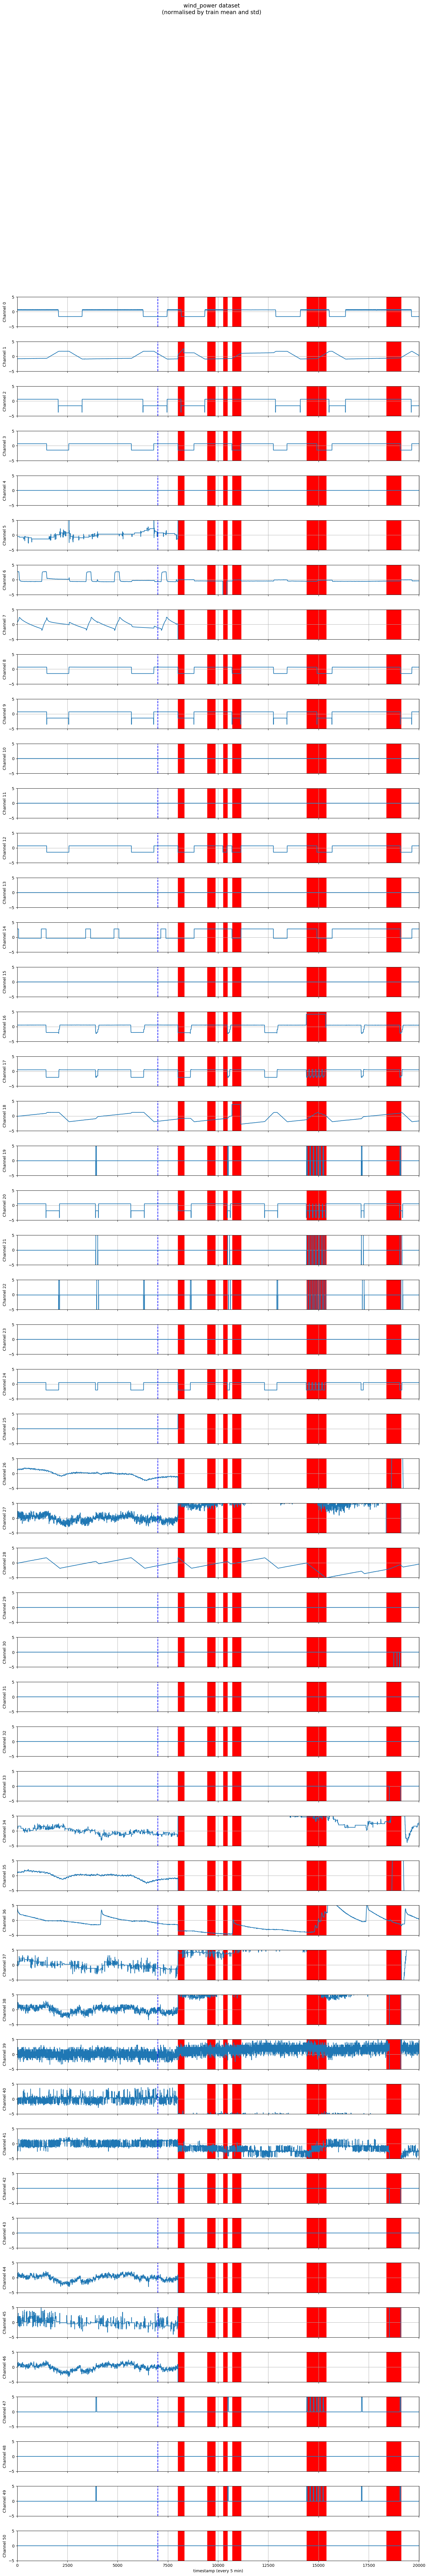

In [44]:
dataset = 'wind_power'
idx_split = [0,7000]

t, readings_normalised = process_and_save_specified_dataset(dataset, idx_split,save_file=True)